In [1]:
import numpy as np
import pandas as pd

import nltk
nltk.download("stopwords")
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize.toktok import ToktokTokenizer

import re
from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
movie_reviews = pd.read_csv("../data/IMDBDataset.csv")

In [3]:
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
movie_reviews.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
#checking total value counts for the sentiment column --positive and negative
movie_reviews["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

# Tokenisation
Tokenization is the process of breaking down a text into individual words or tokens. It allows you to analyze texts at a granular level by working with individual words.

In [6]:
tokenizers = ToktokTokenizer()
stopwords = nltk.corpus.stopwords.words("english")

In [7]:
#defining a function for removing noise from the text
def text_noise_remover(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    text = re.sub("\[[^]]*\]", "", text)
    return text

#applying noise remover function on review column
movie_reviews["review"] = movie_reviews["review"].apply(text_noise_remover)

<ipython-input-7-9a2493da3329>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [8]:
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
movie_reviews["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

# Stemming
Stemming is the process of reducing words to their base or root form. Stemming reduces words to their linguistic root, which aids in consolidating similar words and capturing the core meaning. For example, "running" and "runner" both reduce to "run."

In [10]:
#defining a function for stemming
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = " ".join([ps.stem(word) for word in text.split()])
    return text

#applying stemmer function on review column
movie_reviews["review"] = movie_reviews["review"].apply(simple_stemmer)

In [11]:
movie_reviews.head()

,review,sentiment
0,one of the other review ha mention that after ...,positive
1,a wonder littl production. the film techniqu i...,positive
2,i thought thi wa a wonder way to spend time on...,positive
3,basic there' a famili where a littl boy (jake)...,negative
4,"petter mattei' ""love in the time of money"" is ...",positive


In [12]:
movie_reviews["review"][0]

"one of the other review ha mention that after watch just 1 oz episod you'll be hooked. they are right, as thi is exactli what happen with me.th first thing that struck me about oz wa it brutal and unflinch scene of violence, which set in right from the word go. trust me, thi is not a show for the faint heart or timid. thi show pull no punch with regard to drugs, sex or violence. it is hardcore, in the classic use of the word.it is call oz as that is the nicknam given to the oswald maximum secur state penitentary. it focus mainli on emerald city, an experiment section of the prison where all the cell have glass front and face inwards, so privaci is not high on the agenda. em citi is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgi deal and shadi agreement are never far away.i would say the main appeal of the show is due to the fact that it goe where other show wouldn't dare. forget pretti pictur paint for mainstr

# Stopwords Removal
Stopwords are common words such as "the," "is," and "and" that are removed from the text because they do not carry significant meaning in most contexts. Removing stopwords helps focus the analysis on essential words and improves the accuracy of natural language processing tasks.

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [14]:
#setting stopwords to english
stop_wr=set(stopwords.words("english"))
print(stop_wr)

{'to', 'was', 'if', 'or', 'and', 've', 'm', 'been', 'needn', 'only', 'wouldn', 'about', "that'll", 'him', 'he', 'himself', "mustn't", 'd', 'isn', 'ourselves', 'do', 'haven', "she's", 'for', "hasn't", 'couldn', 'o', 'she', 'is', 'below', 'such', 'where', 'have', 'which', 'there', 'we', 'are', 'those', 'against', 'from', 'further', 'once', 'few', 'y', 'this', 'between', 'don', 'before', 'wasn', 'up', 'all', 'some', 'myself', 'most', 'because', 'too', 's', 'did', 'weren', 'when', 'theirs', 'other', 'yourself', "isn't", 'be', 'off', 'does', 'doesn', 'shouldn', 'am', 'mustn', 'own', 'now', "wouldn't", 'of', 'so', 'very', "aren't", "don't", 'down', 'ours', 'both', 'during', 'what', 'their', 'that', 'll', 'with', 'on', "should've", 'me', 'his', 'hadn', 'as', "shouldn't", 'ain', 'should', 'a', 'they', "mightn't", 'then', 'the', 'after', 'any', 'can', 'above', 'under', 'in', 'mightn', 'ma', 'nor', "wasn't", 'each', 'whom', 'just', 'my', 'not', 'an', 'by', 'didn', 'why', 'has', 'it', 'had', 'the

In [15]:
#defining a function for removing the stopwords
def stopwords_remover(text, is_lower_case=False):
    tokenizers=ToktokTokenizer()
    tokens = tokenizers.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filter_tokens = [token for token in tokens if token not in stop_wr]
    else:
        filter_tokens = [token for token in tokens if token.lower() not in stop_wr]
    filtered_text = " ".join(filter_tokens)
    return filtered_text


#applying stopwords remover function on review column
movie_reviews["review"] = movie_reviews["review"].apply(stopwords_remover)

In [16]:
movie_reviews.head()

,review,sentiment
0,one review ha mention watch 1 oz episod ' hook...,positive
1,wonder littl production. film techniqu veri un...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,basic ' famili littl boy ( jake ) think ' zomb...,negative
4,"petter mattei ' "" love time money "" visual stu...",positive


In [17]:
movie_reviews["review"][0]

"one review ha mention watch 1 oz episod ' hooked. right , thi exactli happen me.th first thing struck oz wa brutal unflinch scene violence , set right word go. trust , thi show faint heart timid. thi show pull punch regard drugs , sex violence. hardcore , classic use word.it call oz nicknam given oswald maximum secur state penitentary. focus mainli emerald city , experiment section prison cell glass front face inwards , privaci high agenda. em citi home many .. aryans , muslims , gangstas , latinos , christians , italians , irish .... scuffles , death stares , dodgi deal shadi agreement never far away.i would say main appeal show due fact goe show ' dare. forget pretti pictur paint mainstream audiences , forget charm , forget romance ... oz ' mess around. first episod ever saw struck nasti wa surreal , ' say wa readi , watch , develop tast oz , got accustom high level graphic violence. violence , injustic ( crook guard ' sold nickel , inmat ' kill order get away , well mannered , midd

# Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) involves analyzing and visualizing the dataset to understand its structure, patterns, and relationships. EDA techniques, such as histograms, box plots, and word clouds, are employed to gain insights into the dataset's characteristics. EDA helps in identifying trends, outliers, and potential correlations.

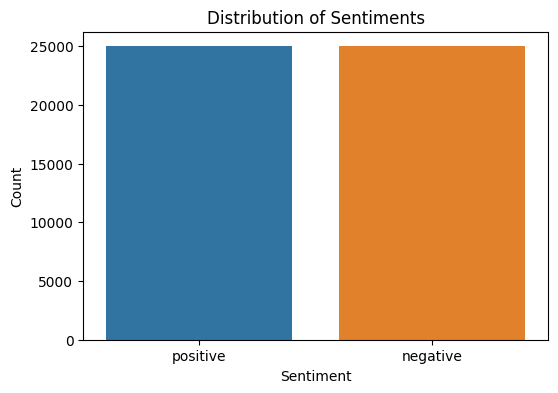

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Sentiments
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=movie_reviews)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

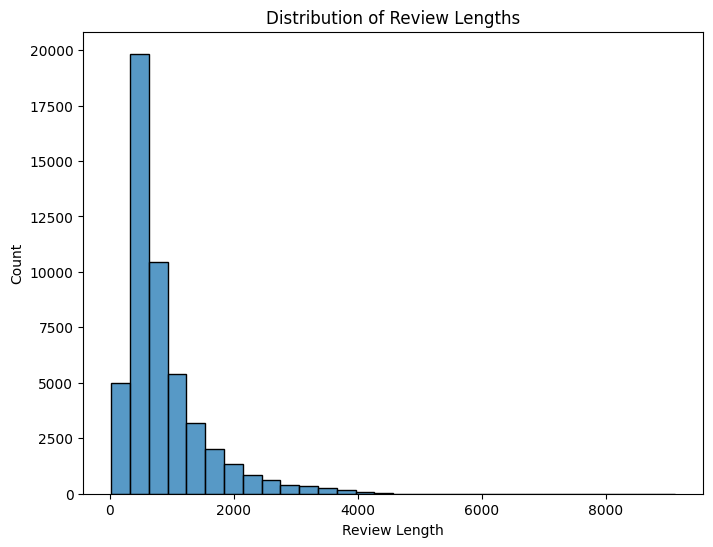

In [19]:
# Review Lengths
movie_reviews['review_length'] = movie_reviews['review'].apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(movie_reviews['review_length'], bins=30)
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.title('Distribution of Review Lengths')
plt.show()

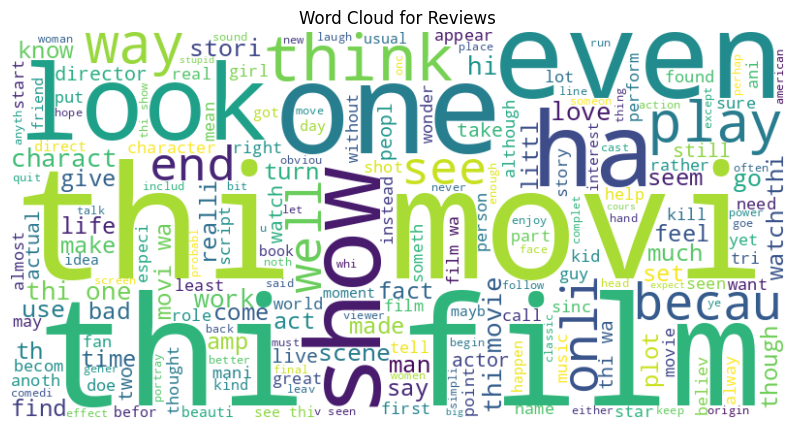

In [37]:
from wordcloud import WordCloud

# all reviews
all_reviews = ' '.join(movie_reviews['review'])

# Generating the Word Cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()


# Train Test Split
The Train-Test Split is a crucial step in machine learning where the dataset is divided into two subsets: the training set and the testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate the model's performance. By splitting the data, the model's ability to generalize to unseen data can be assessed, ensuring its effectiveness in real-world scenarios.

In [21]:
#splitting the dataset into training and testing
train_reviews = movie_reviews.review[:35000]
test_reviews = movie_reviews.review[35000:]

# Bag of Words (BOW)
Bag of Words (BOW) is a text representation technique where the frequency of each word in a document is used as a feature. Count Vectorization is a BOW method implemented using CountVectorizer from scikit-learn. It converts text data into numerical vectors based on the word frequencies. BOW representation allows machine learning models to work with text data effectively.

In [22]:
count_vect = CountVectorizer(min_df=0, max_df=1, binary=False, ngram_range=(1,3))

#transforming train and test reviews --CountVectorizer
count_vect_train = count_vect.fit_transform(train_reviews)
count_vect_test = count_vect.transform(test_reviews)

print("BOW_count_vect_train:", count_vect_train.shape)
print("BOW_count_vect_test:", count_vect_test.shape)

BOW_count_vect_train: (35000, 5677126)
BOW_count_vect_test: (15000, 5677126)


# TF-IDF
TF-IDF is a numerical statistic used to reflect how important a word is to a document in a collection or corpus. It takes into account both the frequency of the word in a document and its rarity in the entire corpus. TF-IDF representation highlights words that are both frequent in a document and rare in the entire dataset, providing valuable features for machine learning models.

In [23]:
tf_vect = TfidfVectorizer(min_df=0, max_df=1, use_idf=True, ngram_range=(1,3))

#transforming train and test reviews --TfidfVectorizer
tf_vect_train = tf_vect.fit_transform(train_reviews)
tf_vect_test = tf_vect.transform(test_reviews)

print("tf_vect_train:", tf_vect_train.shape)
print("tf_vect_test:", tf_vect_test.shape)

tf_vect_train: (35000, 5677126)
tf_vect_test: (15000, 5677126)


# Label Encoding
Label Encoding is the process of converting categorical labels (in this case, sentiment labels like 'positive' and 'negative') into numerical values. It is essential for machine learning algorithms to interpret categorical data, enabling the model to understand and learn from the labeled classes during training.

In [24]:
#labeling the sentiment data as 0 and 1
label = LabelBinarizer()

#transforming sentiment column
sentiment_data = label.fit_transform(movie_reviews["sentiment"])
print(sentiment_data.shape)

(50000, 1)


In [25]:
#splitting sentiment data --train and test
train_reviews = movie_reviews.sentiment[:35000]
test_reviews = movie_reviews.sentiment[35000:]

# Model Training
Model Training involves selecting an appropriate machine learning algorithm and fitting it to the training data.

BOW

In [26]:
#logistic regression
lr = LogisticRegression(penalty="l2", max_iter=500, C=1.0, random_state=42)

#fitting the model with BOW
lr_bow = lr.fit(count_vect_train, train_reviews)
print(lr_bow)

LogisticRegression(max_iter=500, random_state=42)


In [27]:
#predicting with BOW --test data
bow_pred = lr.predict(count_vect_test)
print(bow_pred)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [28]:
#accuracy score --BOW
lr_bow_accuracy = accuracy_score(test_reviews, bow_pred)
print("lr_bow_accuracy:", lr_bow_accuracy)

lr_bow_accuracy: 0.5856


TF-IDF

In [29]:
#fitting the model with tfidf
lr_tfidf = lr.fit(tf_vect_train, train_reviews)
print(lr_tfidf)

LogisticRegression(max_iter=500, random_state=42)


In [30]:
#predicting with TFIDF --test data
tfidf_pred = lr.predict(tf_vect_test)
print(tfidf_pred)

['negative' 'positive' 'negative' ... 'negative' 'positive' 'positive']


In [31]:
#accuracy score --TF-IDF
lr_tfidf_accuracy = accuracy_score(test_reviews, tfidf_pred)
print("lr_tfidf_accuracy:", lr_tfidf_accuracy)

lr_tfidf_accuracy: 0.7445333333333334
